<a href="https://colab.research.google.com/github/RohanShukla29/Coursera_Capstone/blob/master/Capstone_IBM_neighbourhoods%20in%20mumbai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analysing Ideal Neighbourhoods for Living in Mumbai**

The notebook implements the K Meaans Clustering algorithm, based on the top 10 visited places in the neighbourhoods of Mumbai.
Clusters are formed and analysed. They are categorized into ones where people go for visits, and ones where people prefer to live.

All the libraries are imported, including ones to process json files and ones to display the clusters on the map.

In [ ]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


Since there is no particular dataset predefined for the task, we need to scrape the Web and get the neighbourhoods and the areas that fall into them. 

The Web Link used to get the data is: [Wikipedia Link <---](https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Mumbai)

Instead of the Beautiful Soap Web scraping library, we use the inbuilt fuction from the Pandas Library

In [ ]:
url = 'https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Mumbai'
df_list = pd.read_html(url)
len(df_list)
df=df_list[0]
df.head()

,Area,Location,Latitude,Longitude
0,Amboli,"Andheri,Western Suburbs",19.129300,72.843400
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833
2,D.N. Nagar,"Andheri,Western Suburbs",19.124085,72.831373
3,Four Bungalows,"Andheri,Western Suburbs",19.124714,72.827210
4,Lokhandwala,"Andheri,Western Suburbs",19.130815,72.829270


The boroughs and the number of neighbourhoods present in them are listed using the value_counts() function. 

In [ ]:
df['Location'].value_counts()


South Mumbai                       30
Andheri,Western Suburbs             8
Western Suburbs                     6
Eastern Suburbs                     4
Bandra,Western Suburbs              3
Powai,Eastern Suburbs               3
Ghatkopar,Eastern Suburbs           3
Mira-Bhayandar,Western Suburbs      3
Kandivali West,Western Suburbs      3
Borivali (West),Western Suburbs     2
Kalbadevi,South Mumbai              2
Khar,Western Suburbs                2
Goregaon,Western Suburbs            2
Mumbai                              2
Harbour Suburbs                     2
Vasai,Western Suburbs               2
Malad,Western Suburbs               2
Kamathipura,South Mumbai            1
Trombay,Harbour Suburbs             1
Kandivali East,Western Suburbs      1
Sanctacruz,Western Suburbs          1
Dadar,South Mumbai                  1
Govandi,Harbour Suburbs             1
Fort,South Mumbai                   1
Antop Hill,South Mumbai             1
Byculla,South Mumbai                1
Tardeo,South

All the neighbourhoods are combined using the groupby() function into a single borough attribute. The are separated using the ',' delimiter

In [ ]:
df2=df.groupby(['Location'], sort=False, as_index=False).agg(', '.join)
df2['Latitude']=""
df2['Longitude']=""
df2.head()

,Location,Area,Latitude,Longitude
0,"Andheri,Western Suburbs","Amboli, D.N. Nagar, Four Bungalows, Lokhandwal...",,
1,Western Suburbs,"Chakala, Andheri, Dahisa, Jogeshwari West, Juh...",,
2,"Mira-Bhayandar,Western Suburbs","Mira Road, Bhayandar, Uttan",,
3,"Bandra,Western Suburbs","Bandstand Promenade, Kherwadi, Pali Hill",,
4,"Borivali (West),Western Suburbs","I.C. Colony, Gorai",,


In [ ]:
df2.shape

(31, 4)

The latitude and the longitude values are appended to the each borough. Since we did not have a specific value of longitudes and latitudes, we have taken the mean of all the neighbourhoods lying in the boroughs as the latitude and the longtude values of the borough. transform() method is used to take the mean, anf they are joined in the dataset using left join. 

In [ ]:
df4=df[['Location','Latitude','Longitude']]
df5=df4.groupby(['Location'], sort=False, as_index=False).transform('mean')
df5['Location']=df['Location']
df8 = pd.merge(df2,df5,how='left',on='Location',left_index=True)
df8.drop_duplicates(inplace=True, ignore_index=True)
df9=df8[["Location","Area","Latitude_y","Longitude_y"]]
df9.shape



(31, 4)

In [ ]:
df = df9.rename(columns = {'Latitude_y': 'Latitude', 'Longitude_y': 'Longitude'}, inplace = False)
df.head(32)

,Location,Area,Latitude,Longitude
0,"Andheri,Western Suburbs","Amboli, D.N. Nagar, Four Bungalows, Lokhandwal...",19.122009,72.839780
1,Western Suburbs,"Chakala, Andheri, Dahisa, Jogeshwari West, Juh...",19.191909,72.838363
2,"Mira-Bhayandar,Western Suburbs","Mira Road, Bhayandar, Uttan",19.284722,72.835370
3,"Bandra,Western Suburbs","Bandstand Promenade, Kherwadi, Pali Hill",19.055339,72.825511
4,"Borivali (West),Western Suburbs","I.C. Colony, Gorai",19.248548,72.815926
5,"Goregaon,Western Suburbs","Aarey Milk Colony, Bangur Nagar",19.157927,72.857004
6,"Kandivali West,Western Suburbs","Charkop, Poisar, Mahavir Nagar",19.210671,72.836984
7,"Kandivali East,Western Suburbs",Thakur village,19.210206,72.872980
8,"Khar,Western Suburbs","Pali Naka, Khar Danda",19.065670,72.834719
9,"Malad,Western Suburbs","Dindoshi, Sunder Nagar",19.175691,72.853445


The 31 boroughs obtained are then plotted on the map with the help of folium library.

In [ ]:
map_mumbai = folium.Map(location=[19.2,72.8],zoom_start=10.35)
for lat,lng,borough,neighbourhood in zip(df['Latitude'],df['Longitude'],df['Location'],df['Area']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_mumbai)
map_mumbai

**Authentication with FOURSQUARE API**

In [ ]:
CLIENT_ID = 'YRJFTEMC01WIDDPRDLZNBPTEHL5HJTRKKFHHWPEHRDY4IOWJ' # your Foursquare ID
CLIENT_SECRET = 'W2J31ZDM1J3VPYBW4M53NAPJCBRTMJPUDHY1NF32WCB20LKR' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: YRJFTEMC01WIDDPRDLZNBPTEHL5HJTRKKFHHWPEHRDY4IOWJ
CLIENT_SECRET:W2J31ZDM1J3VPYBW4M53NAPJCBRTMJPUDHY1NF32WCB20LKR


We obtain the nearby venues of the boroughs of mumbai using the FourSquare API. The radius is set to 500 meters.

In [ ]:

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            100)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    print('Found {} venues in {} neighborhoods.'.format(nearby_venues.shape[0], len(venues_list)))
    
    return(nearby_venues)
mumbai_venues = getNearbyVenues(names=df['Location'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Found 405 venues in 25 neighborhoods.


In [ ]:
mumbai_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Andheri,Western Suburbs",19.122009,72.83978,Shawarma Factory,19.124591,72.840398,Falafel Restaurant
1,"Andheri,Western Suburbs",19.122009,72.83978,Shetty's Corner,19.124845,72.837858,Chinese Restaurant
2,"Andheri,Western Suburbs",19.122009,72.83978,Cafe Alfa,19.119667,72.843560,Indian Restaurant
3,"Andheri,Western Suburbs",19.122009,72.83978,Vrindavan Veg Restaurant,19.124922,72.838039,Vegetarian / Vegan Restaurant
4,"Andheri,Western Suburbs",19.122009,72.83978,Shot Snooker Club,19.120032,72.839537,Athletics & Sports


In [ ]:
mumbai_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Andheri,Western Suburbs",7,7,7,7,7,7
"Antop Hill,South Mumbai",5,5,5,5,5,5
"Bandra,Western Suburbs",32,32,32,32,32,32
"Byculla,South Mumbai",4,4,4,4,4,4
Eastern Suburbs,7,7,7,7,7,7
"Fort,South Mumbai",6,6,6,6,6,6
"Ghatkopar,Eastern Suburbs",8,8,8,8,8,8
"Goregaon,Western Suburbs",9,9,9,9,9,9
"Govandi,Harbour Suburbs",10,10,10,10,10,10


**ONE HOT ENCODING** is used to expand the attributes of the boroughs. This will be helpful in determining the most visited locations in the neighbourhoods.

In [ ]:
# one hot encoding
mumbai_onehot = pd.get_dummies(mumbai_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
mumbai_onehot['Neighborhood'] = mumbai_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [mumbai_onehot.columns[-1]] + list(mumbai_onehot.columns[:-1])
mumbai_onehot = mumbai_onehot[fixed_columns]

mumbai_onehot.head()

mumbai_grouped = mumbai_onehot.groupby('Neighborhood').mean().reset_index()
mumbai_grouped

,Neighborhood,Women's Store,American Restaurant,Antique Shop,Arcade,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Bed & Breakfast,Beer Garden,Bike Rental / Bike Share,Bookstore,Breakfast Spot,Brewery,Burger Joint,Bus Station,Café,Chinese Restaurant,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Auditorium,College Cafeteria,Concert Hall,Convenience Store,Creperie,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dhaba,Diner,Donut Shop,Electronics Store,Event Space,Falafel Restaurant,Fast Food Restaurant,...,Metro Station,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Movie Theater,Moving Target,Mughlai Restaurant,Nightclub,North Indian Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Pharmacy,Pizza Place,Platform,Plaza,Pool,Pub,Racetrack,Residential Building (Apartment / Condo),Restaurant,Road,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shopping Mall,Smoke Shop,Snack Place,Spa,Sporting Goods Shop,Stadium,Steakhouse,Sushi Restaurant,Tex-Mex Restaurant,Train Station,Tunnel,Vegetarian / Vegan Restaurant,Wine Shop
0,"Andheri,Western Suburbs",0.000000,0.000000,0.0,0.000000,0.000000,0.142857,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.0,0.000000,0.000000,0.00000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0000,0.142857,0.000000,...,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.0,0.142857,0.00000
1,"Antop Hill,South Mumbai",0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0000,0.000000,0.200000,...,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.00000,0.200000,0.200000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000
2,"Bandra,Western Suburbs",0.000000,0.000000,0.0,0.000000,0.031250,0.000000,0.0,0.125000,0.093750,0.000000,0.03125,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.031250,0.000000,0.0,0.000000,0.031250,0.03125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250,0.000000,0.000000,0.0,0.000000,0.000000,0.0625,0.000000,0.031250,...,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.03125,0.000000,0.000000,0.0,0.000000,0.03125,0.000000,0.062500,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.031250,0.031250,0.000000,0.000000,0.031250,0.000000,0.000000,0.000000,0.0,0.000000,0.03125
3,"Byculla,South Mumbai",0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000
4,Eastern Suburbs,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.142857,0.000000,0.000000,0.00000,0.0,0.00000

each neighbourhood with top 10 venues

In [ ]:
num_top_venues = 10

for hood in mumbai_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = mumbai_grouped[mumbai_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')
    

----Andheri,Western Suburbs----
                           venue  freq
0             Chinese Restaurant  0.14
1  Vegetarian / Vegan Restaurant  0.14
2                  Train Station  0.14
3             Athletics & Sports  0.14
4              Indian Restaurant  0.14
5             Falafel Restaurant  0.14
6              College Cafeteria  0.14
7                  Moving Target  0.00
8             Miscellaneous Shop  0.00
9     Modern European Restaurant  0.00


----Antop Hill,South Mumbai----
                           venue  freq
0                    Pizza Place   0.2
1           Fast Food Restaurant   0.2
2                           Café   0.2
3                         Garden   0.2
4                       Pharmacy   0.2
5      Middle Eastern Restaurant   0.0
6                           Park   0.0
7  Paper / Office Supplies Store   0.0
8        North Indian Restaurant   0.0
9                      Nightclub   0.0


----Bandra,Western Suburbs----
                   venue  freq
0           

These venues are converted into a dataframe.

In [ ]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = mumbai_grouped['Neighborhood']

for ind in np.arange(mumbai_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(mumbai_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Andheri,Western Suburbs",Vegetarian / Vegan Restaurant,Train Station,Indian Restaurant,College Cafeteria,Athletics & Sports,Chinese Restaurant,Falafel Restaurant,Fish & Chips Shop,Department Store,Dessert Shop
1,"Antop Hill,South Mumbai",Fast Food Restaurant,Pharmacy,Pizza Place,Garden,Café,Wine Shop,Deli / Bodega,Department Store,Dessert Shop,Dhaba
2,"Bandra,Western Suburbs",Bakery,Bar,Café,Indian Restaurant,Event Space,Pizza Place,Wine Shop,German Restaurant,Ice Cream Shop,Fast Food Restaurant
3,"Byculla,South Mumbai",Indian Restaurant,Restaurant,Wine Shop,Fish & Chips Shop,Deli / Bodega,Department Store,Dessert Shop,Dhaba,Diner,Donut Shop
4,Eastern Suburbs,Light Rail Station,Vegetarian / Vegan Restaurant,Bakery,Café,Seafood Restaurant,Restaurant,Fast Food Restaurant,Fish & Chips Shop,Department Store,Dessert Shop
5,"Fort,South Mumbai",Convenience Store,Harbor / Marina,Hotel,Juice Bar,Flea Market,Department Store,Dessert Shop,Dhaba,Diner,Donut Shop
6,"Ghatkopar,Eastern Suburbs",Indian Restaurant,Coffee Shop,Bakery,Donut Shop,Metro Station,Men's Store,Wine Shop,Fast Food Restaurant,Department Store,Dessert Shop
7,"Goregaon,Western Suburbs",Indian Restaurant,Hotel,Sandwich Place,Lounge,Fast Food Restaurant,Chinese Restaurant,Café,Gym / Fitness Center,Bakery,Bar
8,"Govandi,Harbour Suburbs",Paper / Office Supplies Store,Gastropub,Electronics Store,Diner,Pool,Smoke Shop,Coffee Shop,Bar,General Entertainment,Indian Restaurant
9,Harbour Suburbs,Park,Tunnel,Indian Restaurant,Pub,Chinese Restaurant,Fast Food Restaurant,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop


In [ ]:
df.sort_values(by="Location",axis=0,ascending=True)

,Location,Area,Latitude,Longitude
0,"Andheri,Western Suburbs","Amboli, D.N. Nagar, Four Bungalows, Lokhandwal...",19.122009,72.839780
22,"Antop Hill,South Mumbai",C.G.S. colony,19.016378,72.856629
3,"Bandra,Western Suburbs","Bandstand Promenade, Kherwadi, Pali Hill",19.055339,72.825511
4,"Borivali (West),Western Suburbs","I.C. Colony, Gorai",19.248548,72.815926
23,"Byculla,South Mumbai",Dagdi Chawl,18.977129,72.829131
24,"Colaba,South Mumbai",Navy Nagar,18.901200,72.810100
25,"Dadar,South Mumbai",Hindu colony,19.020841,19.020841
13,Eastern Suburbs,"Bhandup, Kanjurmarg, Vidyavihar, Vikhroli",19.115000,72.926500
26,"Fort,South Mumbai",Ballard Estate,18.950000,72.840000
14,"Ghatkopar,Eastern Suburbs","Amrut Nagar, Asalfa, Pant Nagar",19.091026,72.907945



**CLUSTER neighbourhoods using K Means**




In [ ]:
# set number of clusters
kclusters = 3

mumbai_grouped_clustering = mumbai_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=2).fit(mumbai_grouped_clustering)

# check cluster labels generated for each row in the dataframe
#kmeans.labels_[0:10] 
kmeans.labels_


array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       2, 0, 0], dtype=int32)

In [ ]:
kmeans.labels_.size

25

In [ ]:
df.shape

(25, 5)

Since there are venues who do not have ditinct locations as their top 10 venues, they are excluded from the database. These are:


1.   Dadar
2.   Kurla
3.   Mira-Bhyandar
4.   Trombay
5.   Borivali West
6.   Colaba



In [ ]:

df.drop(df[df.Location == 'Dadar,South Mumbai'].index, inplace = True)
df.drop(df[df.Location == 'Kurla,Eastern Suburbs'].index, inplace = True)
df.drop(df[df.Location == 'Mira-Bhayandar,Western Suburbs'].index, inplace = True)
df.drop(df[df.Location == 'Trombay,Harbour Suburbs'].index, inplace = True)
df.drop(df[df.Location == 'Borivali (West),Western Suburbs'].index, inplace = True)
df.drop(df[df.Location == 'Colaba,South Mumbai'].index, inplace = True)



mumbai_merged = df

# add clustering labels
mumbai_merged['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
mumbai_merged = mumbai_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Location')

mumbai_merged.head() # check the last columns!

,Location,Area,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Andheri,Western Suburbs","Amboli, D.N. Nagar, Four Bungalows, Lokhandwal...",19.122009,72.839780,0,Vegetarian / Vegan Restaurant,Train Station,Indian Restaurant,College Cafeteria,Athletics & Sports,Chinese Restaurant,Falafel Restaurant,Fish & Chips Shop,Department Store,Dessert Shop
1,Western Suburbs,"Chakala, Andheri, Dahisa, Jogeshwari West, Juh...",19.191909,72.838363,0,Indian Restaurant,Chinese Restaurant,Bar,Fast Food Restaurant,Gym,Restaurant,Grocery Store,Italian Restaurant,Department Store,Coffee Shop
3,"Bandra,Western Suburbs","Bandstand Promenade, Kherwadi, Pali Hill",19.055339,72.825511,0,Bakery,Bar,Café,Indian Restaurant,Event Space,Pizza Place,Wine Shop,German Restaurant,Ice Cream Shop,Fast Food Restaurant
5,"Goregaon,Western Suburbs","Aarey Milk Colony, Bangur Nagar",19.157927,72.857004,1,Indian Restaurant,Hotel,Sandwich Place,Lounge,Fast Food Restaurant,Chinese Restaurant,Café,Gym / Fitness Center,Bakery,Bar
6,"Kandivali West,Western Suburbs","Charkop, Poisar, Mahavir Nagar",19.210671,72.836984,0,Indian Restaurant,Dessert Shop,Chinese Restaurant,Bike Rental / Bike Share,Fast Food Restaurant,Wine Shop,Flea Market,Department Store,Dhaba,Diner


The map clusters are plotted in the map. These clusters mailny identify the areas where one should not prefer to live and the ones which have significant people living in that locality.

In [ ]:
map_clusters = folium.Map(location=[19.2, 72.8], zoom_start=10.35, )

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(mumbai_merged['Latitude'], mumbai_merged['Longitude'], mumbai_merged['Location'], mumbai_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [ ]:
mumbai_cluster_0 = mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 0, mumbai_merged.columns[[0] + list(range(4, mumbai_merged.shape[1]))]]

mumbai_cluster_1 = mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 1, mumbai_merged.columns[[0] + list(range(4, mumbai_merged.shape[1]))]]

mumbai_cluster_2 = mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 2, mumbai_merged.columns[[0] + list(range(4, mumbai_merged.shape[1]))]]

In [ ]:
mumbai_cluster_0

,Location,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Andheri,Western Suburbs",0,Vegetarian / Vegan Restaurant,Train Station,Indian Restaurant,College Cafeteria,Athletics & Sports,Chinese Restaurant,Falafel Restaurant,Fish & Chips Shop,Department Store,Dessert Shop
1,Western Suburbs,0,Indian Restaurant,Chinese Restaurant,Bar,Fast Food Restaurant,Gym,Restaurant,Grocery Store,Italian Restaurant,Department Store,Coffee Shop
3,"Bandra,Western Suburbs",0,Bakery,Bar,Café,Indian Restaurant,Event Space,Pizza Place,Wine Shop,German Restaurant,Ice Cream Shop,Fast Food Restaurant
6,"Kandivali West,Western Suburbs",0,Indian Restaurant,Dessert Shop,Chinese Restaurant,Bike Rental / Bike Share,Fast Food Restaurant,Wine Shop,Flea Market,Department Store,Dhaba,Diner
7,"Kandivali East,Western Suburbs",0,Ice Cream Shop,Indian Restaurant,Pizza Place,Coffee Shop,Fast Food Restaurant,Juice Bar,Café,Japanese Restaurant,Residential Building (Apartment / Condo),Restaurant
8,"Khar,Western Suburbs",0,Bar,Indian Restaurant,Dessert Shop,Café,Asian Restaurant,Seafood Restaurant,Salad Place,Cocktail Bar,Lounge,Fish & Chips Shop
9,"Malad,Western Suburbs",0,Vegetarian / Vegan Restaurant,Pizza Place,Indian Restaurant,Snack Place,Wine Shop,Fish & Chips Shop,Deli / Bodega,Department Store,Dessert Shop,Dhaba
10,"Sanctacruz,Western Suburbs",0,Indian Restaurant,Women's Store,Market,Middle Eastern Restaurant,Pizza Place,Platform,Lounge,Clothing Store,Chinese Restaurant,Jewelry Store
11,"Vasai,Western Suburbs",0,Train Station,Wine Shop,Fish & Chips Shop,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dhaba,Diner,Donut Shop
12,"Vile Parle,Western Suburbs",0,Ice Cream Shop,Café,Seafood Restaurant,Sandwich Place,Electronics Store,Gym,Indian Restaurant,Juice Bar,Miscellaneous Shop,Snack Place


In [ ]:
mumbai_cluster_1

,Location,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,"Goregaon,Western Suburbs",1,Indian Restaurant,Hotel,Sandwich Place,Lounge,Fast Food Restaurant,Chinese Restaurant,Café,Gym / Fitness Center,Bakery,Bar
19,"Govandi,Harbour Suburbs",1,Paper / Office Supplies Store,Gastropub,Electronics Store,Diner,Pool,Smoke Shop,Coffee Shop,Bar,General Entertainment,Indian Restaurant


In [ ]:
mumbai_cluster_2

,Location,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
28,"Kamathipura,South Mumbai",2,Indian Restaurant,Fried Chicken Joint,Dessert Shop,Restaurant,Breakfast Spot,BBQ Joint,Flea Market,Ice Cream Shop,Antique Shop,Dhaba


On analysing the three clusters, the 1st cluster containing 22 neighbourhoods are the areas which contain all the types of necessities. On the other hand the other two clusters have only restaurants and luxuries around them. These clusters lack the necessities such as departmental stores, convenience stores and women's store, making them not perfectly suitable to live.

In [ ]:
mumbai_cluster_0.head()

,Location,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Andheri,Western Suburbs",0,Vegetarian / Vegan Restaurant,Train Station,Indian Restaurant,College Cafeteria,Athletics & Sports,Chinese Restaurant,Falafel Restaurant,Fish & Chips Shop,Department Store,Dessert Shop
1,Western Suburbs,0,Indian Restaurant,Chinese Restaurant,Bar,Fast Food Restaurant,Gym,Restaurant,Grocery Store,Italian Restaurant,Department Store,Coffee Shop
3,"Bandra,Western Suburbs",0,Bakery,Bar,Café,Indian Restaurant,Event Space,Pizza Place,Wine Shop,German Restaurant,Ice Cream Shop,Fast Food Restaurant
6,"Kandivali West,Western Suburbs",0,Indian Restaurant,Dessert Shop,Chinese Restaurant,Bike Rental / Bike Share,Fast Food Restaurant,Wine Shop,Flea Market,Department Store,Dhaba,Diner
7,"Kandivali East,Western Suburbs",0,Ice Cream Shop,Indian Restaurant,Pizza Place,Coffee Shop,Fast Food Restaurant,Juice Bar,Café,Japanese Restaurant,Residential Building (Apartment / Condo),Restaurant


To backup our hypothesis of using 3 Clusters, we plot an elbow plot. Here we can observe k=3 as the optimal point to differentiate the data into k clusters.

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f56a0b45860>,
                 k=None, metric=None, model=None, timings=True)

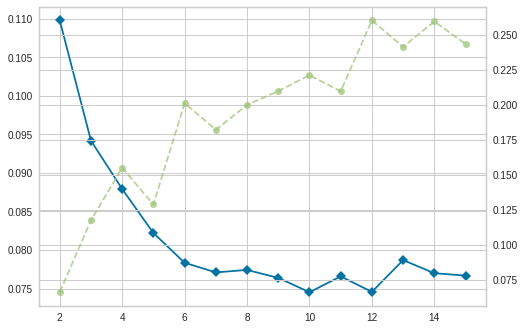

In [ ]:

model=KMeans()
vis=KElbowVisualizer(model,k=(2,16), metric="silhouette")
vis.fit(mumbai_grouped_clustering)



Through the elbow method, we can see that k=3 is the optimal number of clusters obtained.

# **CONCLUSION**

To conclude our analysis, we can identify the neighbourhoods in which one should opt to live and one should not opt to live in mumbai.

Cluster 1: It shows the areas where people opt to live. It consists of 25 areas, consisting of multiple neighbourhoods. We could observe the existence of departmental stores, convenience stores, women's store, gym, stations, grocery stores along with the restaurants and cafes. 

Cluster 2, 3 and other 6 Neighbourhoods: These localities are mainly commercial and entertainment areas. It would not be ideal for one to live in such areas. These areas are mostly the ones consisting of restaurants, bars, flea market, smoking and bbq joints as well as offices and commercial buildings. 

Using K-Means clustering algorithm was beneficial for the unsupervised data where one could cluster the localities into those ideal for living and those which are not.


# **FURTHER SCOPE**

One can back these results by combining it with the average price of the household prevailing in this area. Also, population density at night and daytime can be compared. These analysis would further extrapolate the accuracy of the analyhsis and back it up with statistical significance.